In [6]:
import numpy as np
import matplotlib.pyplot as plt

## v03
* od was not using the smaller step size - fixed that
* (classic confirmation bias situation btw)


In [7]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v03.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

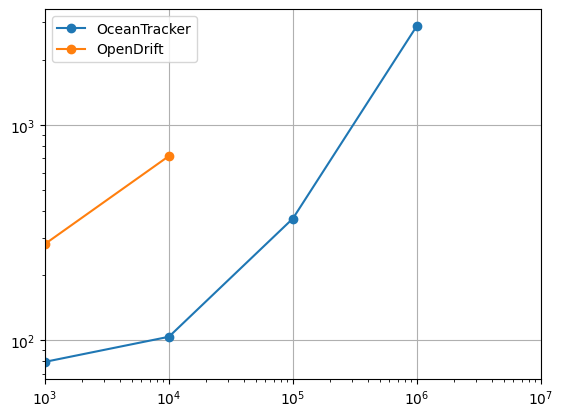

In [33]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e3,1e7)
plt.legend()

In [14]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

79.75468787690359 0.0028001145008932373
231.26229911111125 0.04851583088888887
speedup ot: 17.326373929856192


## v02 - buggy
* disables output writing in OT
* reused the OD points from v01


In [16]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v02.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

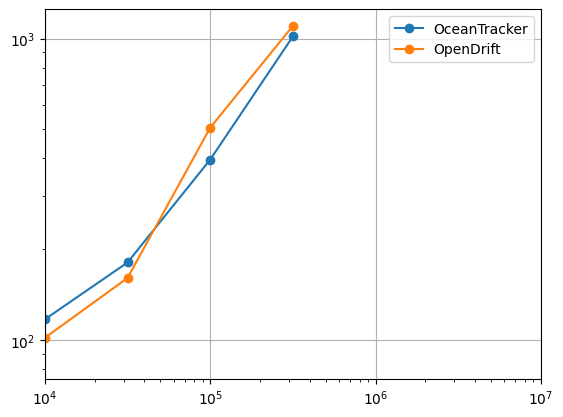

In [17]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [18]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

87.40747294234151 0.0029498262776123324
87.40835403468479 0.0032843996675228334
speedup ot: 1.1134213877100971


## v01 - buggy 
* more release points
* 1min time steps
* ~~no output writing~~ I misconfigured OT and it still wrote the tracks
* integration scheme changed to rk4


In [13]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v01.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

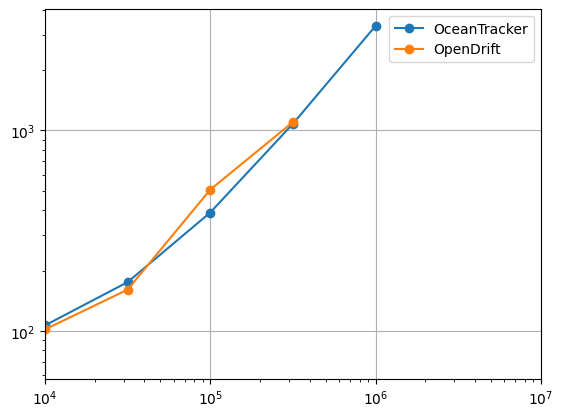

In [14]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [15]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

66.5367369193496 0.003251868681948735
87.40835403468479 0.0032843996675228334
speedup ot: 1.010003782057584


## v00 - initial 

In [11]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v00.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

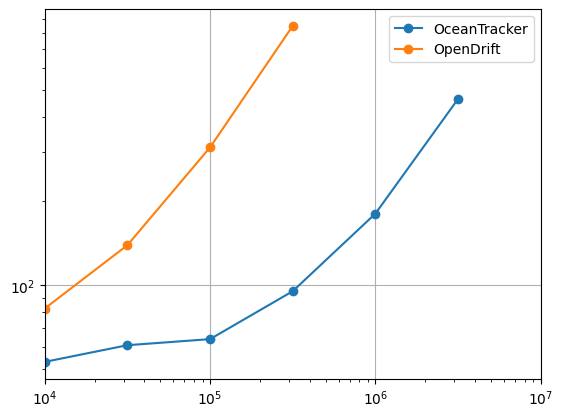

In [12]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [32]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

59.67797034330147 0.00012698916957450088
65.73324578927514 0.002469448901137713
speedup ot: 19.446137882561384
